In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#### Length of the scheme

In [3]:
#length of the scheme, now fixed to 1000
t = np.linspace(0, 50, 1000)
#step in time δt :
#δt=1

### Pulse function and Pulses:

In [4]:
def p(A,t,Δ):
    """Primitive rectangular pulse, A gives the amplitude, t should be evaluated over the array of time, Δ corresponds to the with of the pulse"""
    return A * (abs(t) < Δ/2)

In [5]:
Rabi={
    'Amplitude' : 10 ,
    'Duration' : 6
}

In [6]:
Probe1={
    'Amplitude' : 5 ,
    'Duration' : 7,
    'start time' : 0,
    'end time': 20
}

In [7]:
Rabi['Duration']

6

#### test

In [8]:
P_raa=np.array( p(Rabi['Amplitude'],t- Rabi['Duration']/2 , Rabi['Duration']));
#P_proo=np.array( p(Probe1['Amplitude']+Rabi['Amplitude'],t - Probe1['Duration']/2 , Probe1['Duration']));
P_proo1=np.array( p(Probe1['Amplitude'],t - Probe1['Duration']/2 -2, Probe1['Duration']))
#probe pulse needs to be displaced by -2 to the value of Rabu['Duration'] in order for it to start next to the pulse... interesting

<IPython.core.display.Javascript object>


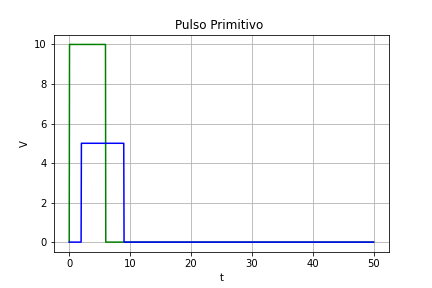

Text(0.5, 1.0, 'Pulso Primitivo ')

In [9]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, P_raa, '-g')
#plt.plot(t,P_proo,'-r')
plt.plot(t,P_proo1,'-b')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')

# Sweeping function

In [10]:
def Sweep(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
    return p_pum, p_sw

In [19]:
def Sweep3(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    time=np.linspace(0, 50, 1000)
    for x in time:
        if (x- Pump['Duration']/2)-(x - (Probe['Duration']/2)-x)== 0 :
            p_sw=np.array([p(Probe['Amplitude']+Pump['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
            return p_pum, p_sw
        else:          
            p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
    return p_pum, p_sw

In [ ]:
def mod():
    
    p_atas=np.array([p(Probe1['Amplitude']+Rabi['Amplitude'],t - (Probe1['Duration']/2)-i, Probe1['Duration']) if (t- Rabi['Duration']/2)-(t - (Probe1['Duration']/2)-i)==0  else p(Probe1['Amplitude'],t - (Probe1['Duration']/2)-i, Probe1['Duration'])  for i in range(Probe1['start time'],Probe1['end time'] + 1) ])

In [11]:
t.shape

(1000,)

In [20]:
ha,ber= Sweep3(Rabi,Probe1,1)

In [13]:
ha2,ber2= Sweep(Rabi,Probe1,2)

In [21]:
ber2.shape

(11, 1000)

In [22]:
ber.shape

(21, 1000)

<IPython.core.display.Javascript object>


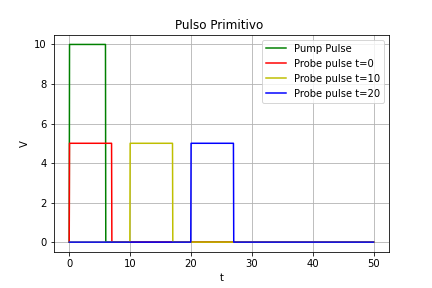

In [23]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, ha, '-g',label='Pump Pulse')
plt.plot(t,ber[0],'-r',label='Probe pulse t=0')
plt.plot(t,ber[10],'-y',label='Probe pulse t=10')
plt.plot(t,ber[20],'-b',label='Probe pulse t=20')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')
ax.legend(loc=0) 

<IPython.core.display.Javascript object>


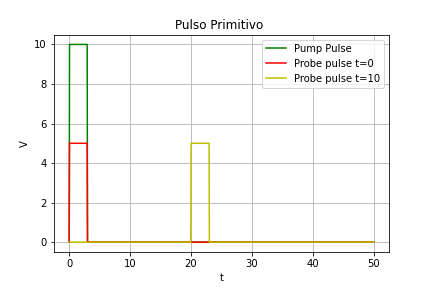

In [59]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, ha, '-g',label='Pump Pulse')
plt.plot(t,ber2[0],'-r',label='Probe pulse t=0')
plt.plot(t,ber2[10],'-y',label='Probe pulse t=10')
#plt.plot(t,ber[20],'-b',label='Probe pulse t=20')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')
ax.legend(loc=0) 

In [20]:
P_ani=np.array( p(Rabi['Amplitude'],t- Rabi['Duration']/2 , Rabi['Duration']))

<IPython.core.display.Javascript object>


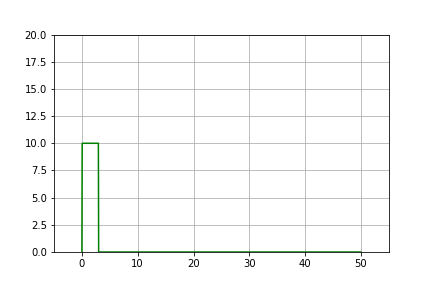

In [26]:
# First set up the figure, the axis, and the plot element we want to animate
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-5, 55), ylim=(0, 20))
ax.grid(True)
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = t
    y = p(Probe1['Amplitude'],t - (Rabi['Duration']-2) - (1*i)  , Probe1['Duration'])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, blit=True)
plt.plot(t, P_ani, '-g')
plt.show()

# ?